In [24]:
import pandas as pd
import numpy as np

data = pd.read_csv("../data/UnblindedOutgrowthData.csv",
                   usecols=['Genotype', 'ID', 'Mean']
                  )


# We want to group by litter, so we need to add a litter column
data['Litter'] = [x[:2] for x in data['ID']]


data.replace(to_replace=['DD','DP','PP'],
             value=['DEE/DEE', 'DEE/+','+/+'],
             inplace=True)

data.rename(index = str, columns = {'Mean':'Outgrowth Length'},
            inplace = True)

In [25]:
data_mean = (data
             .set_index(['Litter','Genotype'])
             .sort_index(level=['Litter','Genotype'])
             .mean(level=['Litter', 'Genotype'])
            )
data_mean

Outgrowth Length
Litter Genotype                  
15     DEE/+                12.93
       DEE/DEE              12.08
16     +/+                  12.55
       DEE/+                13.41
       DEE/DEE              12.68
20     +/+                  10.87
       DEE/+                13.79
       DEE/DEE              12.57
28     +/+                  11.45
       DEE/+                11.86
       DEE/DEE              10.07
29     +/+                  11.23
       DEE/DEE               9.92
31     +/+                   9.37
       DEE/DEE               9.84
32     +/+                   8.37
       DEE/DEE               8.16
35     +/+                   9.59
       DEE/+                 8.91
       DEE/DEE               8.01
36     +/+                   8.99
       DEE/+                 6.32
       DEE/DEE               9.63

In [26]:
wild =   data_mean.xs('+/+',     level = 'Genotype')
hetero = data_mean.xs('DEE/+',   level = 'Genotype')
mutant = data_mean.xs('DEE/DEE', level = 'Genotype')

In [27]:
hetero.index.values

array(['15', '16', '20', '28', '35', '36'], dtype=object)

In [28]:
wild.index.values

array(['16', '20', '28', '29', '31', '32', '35', '36'], dtype=object)

In [29]:
## Not very idiomatic to Pandas, but it works fine for now
het_and_wild_litters = list(set(hetero.index.values) & set(wild.index.values))
mut_and_wild_litters = list(set(mutant.index.values) & set(wild.index.values))


In [30]:
wild.loc[het_and_wild_litters]

,Outgrowth Length
Litter,
36,8.99
16,12.55
20,10.87
35,9.59
28,11.45


In [31]:
wild.loc[mut_and_wild_litters]

,Outgrowth Length
Litter,
36,8.99
16,12.55
20,10.87
32,8.37
35,9.59
31,9.37
29,11.23
28,11.45


In [32]:
## Look at the difference in means between w.t. and mutant
diff_mut = wild.loc[mut_and_wild_litters] - mutant.loc[mut_and_wild_litters]
diff_mut

,Outgrowth Length
Litter,
36,-0.64
16,-0.13
20,-1.69
32,0.21
35,1.58
31,-0.47
29,1.32
28,1.38


In [33]:
## Look at the difference in means between w.t. and het

diff_het = wild.loc[het_and_wild_litters] - mutant.loc[het_and_wild_litters]

In [34]:
from scipy import stats

t_stat = {}
p_val = {}
t_stat['mutant'], p_val['mutant'] = stats.ttest_rel(
    wild.loc[mut_and_wild_litters], mutant.loc[mut_and_wild_litters])

In [35]:
t_stat['mutant']
p_val['mutant']

array([ 0.64954353])

In [36]:
pd.options.display.float_format = '{:,.2f}'.format

normdata_mut = (mutant.loc[mut_and_wild_litters] / wild.loc[mut_and_wild_litters]
                * 100)
normdata_mut

,Outgrowth Length
Litter,
36,107.12
16,101.05
20,115.57
32,97.51
35,83.53
31,105.00
29,88.29
28,87.91


In [37]:
normdata_het = (hetero.loc[het_and_wild_litters] / wild.loc[het_and_wild_litters]
                * 100)
normdata_het

,Outgrowth Length
Litter,
36,70.29
16,106.84
20,126.88
35,92.89
28,103.55


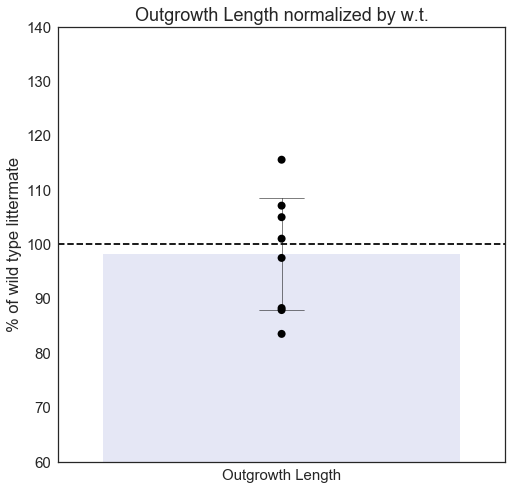

In [38]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns


sns.set(style='ticks', color_codes=True)
sns.set_style("white")

bar_palette = sns.cubehelix_palette(3, start=0.5,
                                    rot=.9, dark=.75,
                                    light=.9)

with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8,8))
    
    normplot = sns.barplot(data = normdata_mut,
                              ci = 'sd',
                              #kind='bar',
                              #size=8
                           #ax=ax
                           #color='white',
                           palette = bar_palette,
                           errcolor = 'black',
                           errwidth = 0.5,
                           #errcolor = sns.xkcd_rgb['dark teal'],
                           capsize = .1
                          )
    
    sns.stripplot(data = normdata_mut,
                  color=sns.xkcd_rgb["black"],
                  #edgecolor='black',
                  size=8,
                  alpha=1,
                 )
    
    
    #sns.stripplot(normdata, ax=ax)
    ax.set_ylabel('% of wild type littermate')
    ax.set_ylim([60,140])
    ax.axhline(100, color='black', linestyle='--')
    ax.set_title('Outgrowth Length normalized by w.t.')

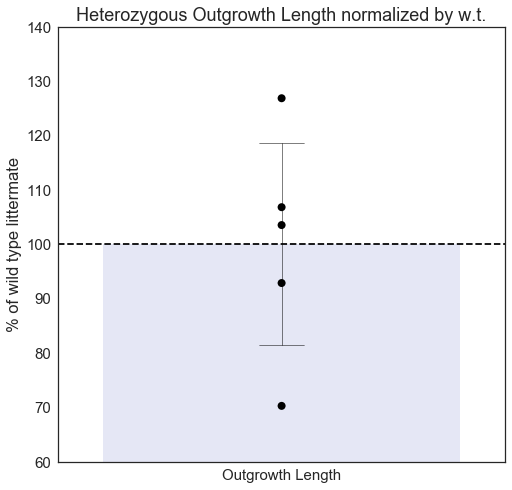

In [39]:
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8,8))
    
    normplot = sns.barplot(data = normdata_het,
                              ci = 'sd',
                              #kind='bar',
                              #size=8
                           #ax=ax
                           #color='white',
                           palette = bar_palette,
                           errcolor = 'black',
                           errwidth = 0.5,
                           #errcolor = sns.xkcd_rgb['dark teal'],
                           capsize = .1
                          )
    
    sns.stripplot(data = normdata_het,
                  color=sns.xkcd_rgb["black"],
                  #edgecolor='black',
                  size=8,
                  alpha=1,
                 )
    
    
    #sns.stripplot(normdata, ax=ax)
    ax.set_ylabel('% of wild type littermate')
    ax.set_ylim([60,140])
    ax.axhline(100, color='black', linestyle='--')
    ax.set_title('Heterozygous Outgrowth Length normalized by w.t.')